In [1]:
import wave
import librosa
import soundfile as sf
import os
from tqdm import tqdm
from glob import glob

# 영상 -> 음원 -> 분리

## 영상 다운로드 하고 wav로 저장

In [125]:
# os.chdir('../')
os.getcwd()

'd:\\Python\\vocoder\\etc'

In [159]:
urls = [
    'https://www.youtube.com/watch?v=UCyz1pNO2oc',  # 김광석 - 잊어야 한다는 마음으로
    'https://www.youtube.com/watch?v=DMw5RKcbKVY',  # 김광석 - 서른 즈음에
    'https://www.youtube.com/watch?v=CYtv_k3fZyU',  # 김광석 - 이등병의 편지
    'https://www.youtube.com/watch?v=nFXTf9PodCw',  # 김광석 - 먼지가 되어
    'https://www.youtube.com/watch?v=ZZEv8ZB6G_s',  # 김광석 - 사랑했지만
    'https://www.youtube.com/watch?v=38aOImEIJ7s',  # 깅광석 - 광야에서
    'https://www.youtube.com/watch?v=vIv4-BjfYMM',  # 김광석 - 그대 웃음소리
    'https://www.youtube.com/watch?v=t0etgCzvohc',  # 김광석 - 흐린 가을 하늘에 편지를 써
    'https://www.youtube.com/watch?v=mOi-NNP_C4o',  # 김광석 - 기다려줘
    'https://www.youtube.com/watch?v=-fQ4sajHM2c',  # 김광석 - 그루터기
    'https://www.youtube.com/watch?v=7UwJkhLMtJQ',  # 김광석 - 말하지 못한 내 사랑
    'https://www.youtube.com/watch?v=oy9BSiKIY4E',  # 김광석 - 거리에서
    'https://www.youtube.com/watch?v=_eYX_SjA8po',  # 김광석 - 슬픈 노래
    'https://www.youtube.com/watch?v=YWVTqzEsbvI',  # 김광석 - 너에게
    'https://www.youtube.com/watch?v=UN088ASfMVw',  # 김광석 - 그날들
    'https://www.youtube.com/watch?v=DfBaNMRybnY',  # 김광석 - 사랑이라는 이유로
    'https://www.youtube.com/watch?v=Iib_LVcq_4A',  # 김광석 - 자유롭게
    'https://www.youtube.com/watch?v=pENqrA4u0EA',  # 김광석 - 맑고 향기롭게
    'https://www.youtube.com/watch?v=Hp1t88gI6bI',  # 김광석 - 끊어진 길
    'https://www.youtube.com/watch?v=9eFOzhmubWA',  # 김광석 - 혼자 남은 밤
    'https://www.youtube.com/watch?v=NASQB-oJ6dI',  # 김광석 - 너무 아픈 사랑이 아니였음을
    'https://www.youtube.com/watch?v=lL__fO7qxJ8',  # 김광석 - 회귀
    'https://www.youtube.com/watch?v=V20kfzhjVw8',  # 김광석 - 바람이 불어오는 곳
    'https://www.youtube.com/watch?v=MrDdP6P5zgg',  # 김광석 - 일어나
    'https://www.youtube.com/watch?v=nxm4Kgg4aFY',  # 김광석 - 행복의 문
    'https://www.youtube.com/watch?v=rwjBjkaUGyU',  # 김광석 - 그대가 기억하는 내 모습
    'https://www.youtube.com/watch?v=LqTpwtskWDw',  # 김광석 - 기대어 앉은 오후에는
    'https://www.youtube.com/watch?v=vXhg-jUpOdY',  # 김광석 - 나무
    'https://www.youtube.com/watch?v=ZpvkSOtASIc',  # 김광석 - 나의 노래
]

len(urls) * 3

87

In [150]:
# 영상 다운로드
from pytube import YouTube
import moviepy.editor as mp
import subprocess
import re

path = './music_files/'

#유튜브 전용 인스턴스 생성
# yt = YouTube('https://www.youtube.com/watch?v=jeqdYqsrsA0') # 아이유 - 좋은날
# yt = YouTube('https://www.youtube.com/watch?v=H9LXmjxuveA') # 소찬휘 - tears
# yt = YouTube('https://www.youtube.com/watch?v=nFXTf9PodCw')     # 김광석 - 먼지가 되어
# yt = YouTube('https://www.youtube.com/watch?v=UCyz1pNO2oc')     # 김광석 - 잊어야 한다는 마음으로
# yt = YouTube('https://www.youtube.com/watch?v=DMw5RKcbKVY')     # 김광석 - 서른 즈음에


for url in urls:
    yt = Youtube(url)
    # 음성 품질이 가장 좋은 영상을 찾아냄
    streams = yt.streams.filter(only_audio=True, file_extension='mp4')
    max_abr = 0

    for stream in streams:
        abr = int(re.findall(r'\d+', stream.abr)[0])
        if abr > max_abr:
            max_abr = abr
            max_stream = stream

    max_stream.download(path)
    print('음악 다운로드 성공!')

    # mp4 -> mp3
    file_name = re.sub(r"\s*\[.*?\]", "", f'{path+yt.title}')
    file_name = re.sub(r"\s*\{.*?\}", "", file_name)
    file_name = re.sub(r'\([^)]*\)', '', file_name)
    file_name = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", file_name).replace(' ','')+'.mp3'


    # print('file_name: ', file_name)
    title = yt.title.replace('|','')
    os.rename(path+title+'.mp4', path+file_name)

    # mp3 -> wav
    infile =  path+file_name
    outfile = f'./music_files/wavfile/{os.path.basename(file_name)[:-4]}.wav'

    # print(infile, outfile)

    command = f'ffmpeg -i {infile} -ac 2 -f wav {outfile}'
    os.system(command)
    os.system(f'del {infile}')

음악 다운로드 성공!


1

In [162]:
os.getcwd()

'd:\\Python\\vocoder\\etc'

In [166]:
yt = YouTube('https://www.youtube.com/watch?v=R-Y7qCw8bmw')

# 음성 품질이 가장 좋은 영상을 찾아냄
streams = yt.streams.filter(only_audio=True, file_extension='mp4')
max_abr = 0

path = './music_files/'

for stream in streams:
    abr = int(re.findall(r'\d+', stream.abr)[0])
    if abr > max_abr:
        max_abr = abr
        max_stream = stream

max_stream.download(path)
print('음악 다운로드 성공!')

# mp4 -> mp3
file_name = re.sub(r"\s*\[.*?\]", "", f'{path+yt.title}')
file_name = re.sub(r"\s*\{.*?\}", "", file_name)
file_name = re.sub(r'\([^)]*\)', '', file_name)
file_name = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", file_name).replace(' ','')+'.mp3'


# print('file_name: ', file_name)
# title = re.sub(r'[^\uAC00-\uD7A30-9a-zA-Z\s]', '', yt.title)
title = yt.title.replace('|','').replace(':','')
os.rename(path+title+'.mp4', path+file_name)

# mp3 -> wav
infile =  path+file_name
outfile = f'./music_files/wavfile/{os.path.basename(file_name)[:-4]}.wav'

# print(infile, outfile)

command = f'ffmpeg -i {infile} -ac 2 -f wav {outfile}'
os.system(command)
os.system(f'del {infile}')

음악 다운로드 성공!


1

## 음성파일 스테레오 -> 모노 변환

In [106]:
# 스테레오 -> 모노 변환
    def stero_to_mono(self, file_path):
        # sound = AudioSegment.from_wav("./music_files/tears.wav")
        sound = AudioSegment.from_wav(file_path)
        sound = sound.set_channels(1)
        sound.export(file_path, format="wav")

## simple rate 44.1khz로 변환하기

In [ ]:
def sr_change(self, file_path):
        # 음성 파일 불러오기
        y, sr = librosa.load(file_path, sr=None)

        # 리샘플링
        y_resampled = librosa.resample(y, sr, 44100)

        # 결과 저장하기
        librosa.output.write_wav(file_path, y_resampled, sr=44100)
        

In [152]:
path = './music_files/wavfile/musicfilesKimKwangSeokAboutThirtyLyricsOnly.wav'
with wave.open(path, 'rb') as audio_file:
    # sr(samplingrate 확인)
    sr = audio_file.getframerate()
    # 채널 수 확인(1=모노)
    channels = audio_file.getnchannels()
    # 비트 수 확인(16비트)
    bit_depth = audio_file.getsampwidth() * 8
    

print(sr, channels, bit_depth)

# librosa.load(path, sr=sr)

if channels == 2:
    mono_to_stereo(path)
    print('모노로 변환')
    
if sr < 44000:
    sr_change(path)
    print('44100Khz로 변환')

with wave.open(path, 'rb') as audio_file:
    # sr(samplingrate 확인)
    sr = audio_file.getframerate()
    # 채널 수 확인(1=모노)
    channels = audio_file.getnchannels()
    # 비트 수 확인(16비트)
    bit_depth = audio_file.getsampwidth() * 8
print(sr, channels, bit_depth)

44100 2 16
모노로 변환
44100 1 16


## 목소리 추출하기

In [148]:
# os.chdir('../../')
os.getcwd()

## 한 소절(마디)씩 자르기

In [154]:
import librosa
import librosa.display
import numpy as np
import wave
import math
import soundfile as sf

def split_voice(file_path, idx=0):
    # Load audio file
    # filename = './music_files/IU_input.wav'
    file_name = os.path.basename(file_path)
    y, sr = librosa.load(file_path, sr=None)

    # 8초 간격으로 자르기
    split_time = 8

    with wave.open(file_path, 'rb') as wave_file:
        # 샘플링 레이트, 채널 수, 샘플 수 정보 가져오기
        framerate = wave_file.getframerate()
        n_frames = wave_file.getnframes()

        # 음성 파일 길이 계산 (초 단위)
        duration = n_frames / float(framerate)
        duration = int(math.ceil(duration))
        
    end = int(duration/split_time)

    for i in range(end):
        start = i * split_time
        end = start + split_time

        # 분할된 파일의 경로와 파일 이름 지정
        output_filename = f"./music_files/split_files/split_{i+idx}.wav"

        # 분할된 파일을 저장
        sf.write(output_filename, y[start*sr:end*sr], sr)
    
    os.system(f'del "./music_files/train_files/{file_name}"')
    return i+idx

## 앞 뒤로 무음 제거하기

In [156]:
from pydub import AudioSegment
import librosa
import librosa.display
import soundfile as sf

def delete_no_voice(file_path):
    if os.path.basename(file_path) == 'vocals.wav':
        del_file = f'./music_files/train_files/{os.path.basename(file_path)}'
        del del_file
        
    # Load audio file
    # filename = './music_files/original.wav'
    file_name = os.path.basename(file_path)
    audio = AudioSegment.from_file(file_path)

    # Remove silent parts
    audio_filtered = audio.strip_silence(silence_thresh=-30)

    
    # Save the output
    audio_filtered.export(f'./music_files/train_files/{file_name}', format='wav')

In [157]:
import os
from glob import glob

# path = './music_files/wavfile/spleeter vocals/musicfiles김광석잊어야한다는마음으로가사.wav'

paths = glob('./music_files/wavfile/spleeter vocals/*.wav')

for path in paths:
    # 전체적으로 한 번 제거
    delete_no_voice(path)
    print('전체적으로 제거')

# 10초 간격으로 분리하기
files = glob('./music_files/train_files/*.wav')
idx = 0
for file in files:
    if idx == 0:
        idx = split_voice(file)
    else:
        idx = split_voice(file, idx)
    
# split_voice('./music_files/train_files/vocals.wav')
print('분리')

# 자른 파일 모두 앞 뒤로 무음 제거
files = glob('./music_files/split_files/*')
for file in files:
    delete_no_voice(file)
    
    with wave.open(file, 'rb') as wave_file:
        # 샘플링 레이트, 채널 수, 샘플 수 정보 가져오기
        framerate = wave_file.getframerate()
        n_frames = wave_file.getnframes()

        # 음성 파일 길이 계산 (초 단위)
        duration = n_frames / float(framerate)
        duration = int(math.ceil(duration))
            
    if duration < 3:
        del file
        print(f'{duration}초 이므로 파일 삭제')

전체적으로 제거
전체적으로 제거
분리


Text(0.5, 1.0, 'Waveform')

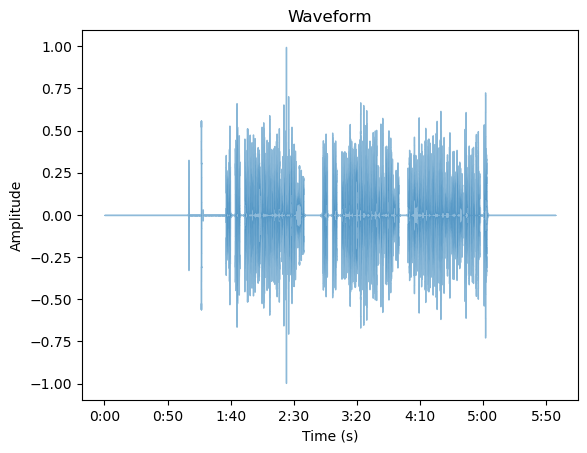

In [114]:
import matplotlib.pyplot as plt
import numpy as np
import librosa.display

sig, sr = librosa.load('./music_files/IU_output.wav', sr = None)

plt.figure()
librosa.display.waveshow(sig, sr=44100, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [2]:
from music_download.Youtube_download_wav import Youtube_to_wav

urls = [
    'https://www.youtube.com/watch?v=UCyz1pNO2oc',  # 김광석 - 잊어야 한다는 마음으로
    'https://www.youtube.com/watch?v=DMw5RKcbKVY',  # 김광석 - 서른 즈음에
    'https://www.youtube.com/watch?v=CYtv_k3fZyU',  # 김광석 - 이등병의 편지
    'https://www.youtube.com/watch?v=nFXTf9PodCw',  # 김광석 - 먼지가 되어
    'https://www.youtube.com/watch?v=ZZEv8ZB6G_s',  # 김광석 - 사랑했지만
    'https://www.youtube.com/watch?v=38aOImEIJ7s',  # 깅광석 - 광야에서
    'https://www.youtube.com/watch?v=vIv4-BjfYMM',  # 김광석 - 그대 웃음소리
    'https://www.youtube.com/watch?v=t0etgCzvohc',  # 김광석 - 흐린 가을 하늘에 편지를 써
    'https://www.youtube.com/watch?v=mOi-NNP_C4o',  # 김광석 - 기다려줘
    'https://www.youtube.com/watch?v=-fQ4sajHM2c',  # 김광석 - 그루터기
    'https://www.youtube.com/watch?v=7UwJkhLMtJQ',  # 김광석 - 말하지 못한 내 사랑
    'https://www.youtube.com/watch?v=oy9BSiKIY4E',  # 김광석 - 거리에서
    'https://www.youtube.com/watch?v=_eYX_SjA8po',  # 김광석 - 슬픈 노래
    'https://www.youtube.com/watch?v=YWVTqzEsbvI',  # 김광석 - 너에게
    'https://www.youtube.com/watch?v=UN088ASfMVw',  # 김광석 - 그날들
    'https://www.youtube.com/watch?v=DfBaNMRybnY',  # 김광석 - 사랑이라는 이유로
    'https://www.youtube.com/watch?v=Iib_LVcq_4A',  # 김광석 - 자유롭게
    'https://www.youtube.com/watch?v=pENqrA4u0EA',  # 김광석 - 맑고 향기롭게
    'https://www.youtube.com/watch?v=Hp1t88gI6bI',  # 김광석 - 끊어진 길
    'https://www.youtube.com/watch?v=9eFOzhmubWA',  # 김광석 - 혼자 남은 밤
    'https://www.youtube.com/watch?v=NASQB-oJ6dI',  # 김광석 - 너무 아픈 사랑이 아니였음을
    'https://www.youtube.com/watch?v=lL__fO7qxJ8',  # 김광석 - 회귀
    'https://www.youtube.com/watch?v=V20kfzhjVw8',  # 김광석 - 바람이 불어오는 곳
    'https://www.youtube.com/watch?v=MrDdP6P5zgg',  # 김광석 - 일어나
    'https://www.youtube.com/watch?v=nxm4Kgg4aFY',  # 김광석 - 행복의 문
    'https://www.youtube.com/watch?v=rwjBjkaUGyU',  # 김광석 - 그대가 기억하는 내 모습
    'https://www.youtube.com/watch?v=LqTpwtskWDw',  # 김광석 - 기대어 앉은 오후에는
    'https://www.youtube.com/watch?v=vXhg-jUpOdY',  # 김광석 - 나무
    'https://www.youtube.com/watch?v=ZpvkSOtASIc',  # 김광석 - 나의 노래
    'https://www.youtube.com/watch?v=PbfYHI8JBR4',  # 김광석 - 다시 아침
    'https://www.youtube.com/watch?v=5Trb3UIZDXY',  # 김광석 - 마음속의 풍경
    'https://www.youtube.com/watch?v=OiCE5W_KTIw',  # 김광석 - 추억
    
]

ytd = Youtube_to_wav()
ytd.video_to_wav(urls)
# ytd.video_to_wav(['https://www.youtube.com/watch?v=fau9T9OphTs&t=77s'])

영상 다운로드 중...:  94%|█████████▍| 30/32 [07:43<00:35, 17.65s/it]

In [ ]:
from audio_settings.audio_set import audio_setting
from glob import glob

files = glob('./music_files/wavfile/*.wav')
ast = audio_setting()
ast.audio_change(files)

모노로 변환


In [ ]:
# os.chdir('../../')
os.getcwd()

'd:\\Python\\vocoder\\etc'

In [9]:
# 목소리 추출하기
# import spleeter
import os
import shutil
from tqdm import tqdm

now_path = os.getcwd()
# os.chdir('./music_files/wavfile/')
os.chdir('./music_download/wav_files/')
files = os.listdir(os.getcwd())
# print(files)
for file in tqdm(files):
    if '.wav' in file:
        # spl = f'spleeter separate -p spleeter:2stems -o output {os.path.basename(file_name)}'
        # file_name = file
        spl = f'spleeter separate -p spleeter:2stems -o output {file}'
        os.system(spl)
        try:
            shutil.move(f'./output/{file[:-4]}/vocals.wav', f'../spleeter vocals/vocals.wav')
            os.rename('../spleeter vocals/vocals.wav', f'../spleeter vocals/{file}')
            shutil.move(f'./{file}', f'../use/{file}')
        except FileExistsError:
            print('파일이 이미 존재합니다.')
        
os.chdir(now_path)

100%|██████████| 6/6 [01:10<00:00, 11.71s/it]


In [1]:
from split_music.split_music import split_sound

ss = split_sound()
ss.run()

간격으로 음성파일 분리중...: 100%|██████████| 3/3 [00:03<00:00,  1.15s/it]


분리


무음 제거중...: 100%|██████████| 60/60 [00:22<00:00,  2.66it/s]
